# Laboratorio 5
### Oscar Fernando López Barrios
### Carné 20679


1. Cargue las librerías y archivos a utilizar en la misma ubicación

In [198]:
import json
import pandas as pd
from pandas import json_normalize
import pickle

In [199]:
data = list()
with open("large_eve.json", "r") as file:
    for line in file:
        json_file = json.loads(line)
        data.append(json_file)

2. Cargue la información del archivo large_even.json en una lista, muestre la cantidad de
registros total (deben ser 746, 909). Este es nuestro tráfico inicial!

In [200]:
print("Cantidad total de registros:", len(data))

Cantidad total de registros: 746909


3. Debido a que estamos buscando dominios web, del total de registros, solamente estamos
interesados en los registros DNS. Cargue únicamente aquellos registros que sean DNS.
4. Muestre la nueva cantidad de registros filtrados.

In [201]:
dns_data = [item for item in data if item["event_type"] == "dns"]

print("Cantidad de registros DNS filtrados:", len(dns_data))

Cantidad de registros DNS filtrados: 15749


In [202]:
dataframe = json_normalize(dns_data)

5. Muestre la información de 2 registros cualesquiera.

In [203]:
dataframe.head(2)

,timestamp,flow_id,pcap_cnt,event_type,vlan,src_ip,src_port,dest_ip,dest_port,proto,dns.type,dns.id,dns.rrname,dns.rrtype,dns.tx_id,dns.rcode,dns.ttl,dns.rdata
0,2017-07-22T17:33:16.661646-0500,1327836194150542,22269,dns,110,2001:0dbb:0c18:0011:0260:6eff:fe30:0863,59680,2001:0500:0001:0000:0000:0000:803f:0235,53,UDP,query,15529,api.wunderground.com,A,0.0,NaN,NaN,NaN
1,2017-07-22T17:33:24.990320-0500,2022925111925872,54352,dns,110,2001:0dbb:0c18:0011:0260:6eff:fe30:0863,38051,2001:0500:0003:0000:0000:0000:0000:0042,53,UDP,query,58278,stork79.dropbox.com,A,0.0,NaN,NaN,NaN


6. Debido a que la data consiste en json anidados, utilice la característica json_normalize para
normalizar la información y asignarla en un dataframe. Muestre el shape del dataframe.

In [204]:
dataframe.shape

(15749, 18)

7. Como estamos buscando dominios DGA, debemos filtrar los registros DNS para aquellos
registros tipo A (son aquellos que mantienen una dirección IP asociada a un dominio). Después
de filtrar debería obtener 2849 registros.

In [205]:
dga_data = dataframe.loc[dataframe["dns.rrtype"] == "A", :]

print("Cantidad de registros DGA filtrados:", len(dga_data))

Cantidad de registros DGA filtrados: 2849


8. Filtre los dominios únicos. Debe obtener 177 registros únicos

In [206]:
len(dga_data["dns.rrname"].unique())

177

9. Escriba una función que obtenga el TLD para un dominio. Por ejemplo, para
api.wunderground.com el TLD es wunderground.com, para
safebrowsing.clients.google.com.home, el TLD es home. Utilice ChatGPT para esta función,
verifique que obtiene correctamente el TLD, incluya el prompt utilizado en su notebook.

In [207]:
def get_tld(domain):
    if domain.endswith('.home'):
        return 'home'
    else:
        parts = domain.split('.')
        tld = '.'.join(parts[-2:])
        return tld

domain1 = "api.wunderground.com"
domain2 = "safebrowsing.clients.google.com.home"

print("TLD para", domain1, "es:", get_tld(domain1))
print("TLD para", domain2, "es:", get_tld(domain2))

TLD para api.wunderground.com es: wunderground.com
TLD para safebrowsing.clients.google.com.home es: home


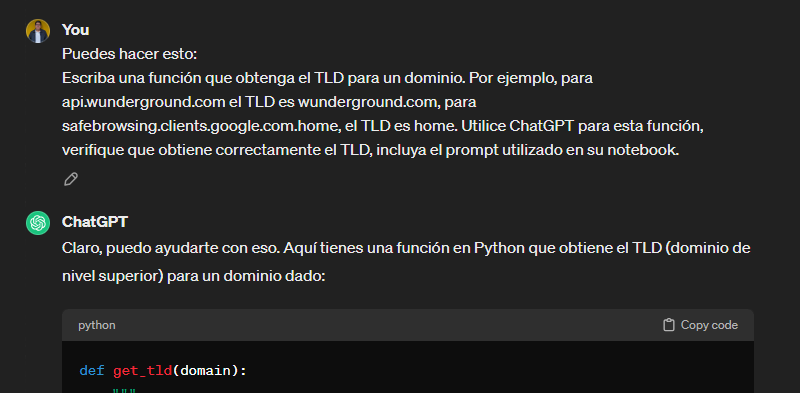

10. Del dataframe de dominios únicos de tipo A, obtenga el TLD (top level domain) utilizando la
función anterior para crear una columna nueva llamada domain_tld, y elimine todas las demás
columnas.

In [208]:
dga_data["domain_tld"] = dga_data["dns.rrname"].apply(get_tld)

domain_tld_dataframe = dga_data[["domain_tld"]]

domain_tld_dataframe

<ipython-input-208-a92d29e49fcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dga_data["domain_tld"] = dga_data["dns.rrname"].apply(get_tld)


,domain_tld
0,wunderground.com
1,dropbox.com
2,aoltw.net
5,wunderground.com
6,home
...,...
15713,comcast.net
15716,stayonline.net
15725,aoltw.net
15737,real.com


11. Utilice el clasificador proporcionado, debe pasarle como parámetro el dataframe con la columna domain_tld, y asignar el resultado a un nuevo dataframe.

In [209]:
from clasificador import clasificacion

domain_tld_dataframe["domain_tld"].fillna("", inplace=True)

<ipython-input-209-f6c62dd32273>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_tld_dataframe["domain_tld"].fillna("", inplace=True)


In [210]:
domain_tld_dga_dataframe = clasificacion(domain_tld_dataframe)

/content/clasificador.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['domain_tld'].str.len()
/content/clasificador.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['digits'] = df['domain_tld'].str.count('[0-9]')
/content/clasificador.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [211]:
domain_tld_dga_dataframe

,domain_tld,isDGA
0,wunderground.com,0
1,dropbox.com,1
2,aoltw.net,1
5,wunderground.com,0
6,home,0
...,...,...
15713,comcast.net,0
15716,stayonline.net,0
15725,aoltw.net,1
15737,real.com,1


12. Filtre aquellos considerados como DGA (valor 1 ) y muéstrelos. Recuerde que los modelos de
ML ofrecen una predicción, pero los resultados pueden incluir falsos positivos y falsos
negativos, por lo que no podemos fiarnos por completo de esta clasificación y debemos seguir
indagando. Después de eliminar duplicados, debe obtener 61 registros únicos.

In [212]:
dga_detected = domain_tld_dga_dataframe[domain_tld_dga_dataframe['isDGA'] == 1]

dga_unique = dga_detected.drop_duplicates(subset=['domain_tld'])

print("Cantidad de registros únicos DGA detectados:", len(dga_unique))
dga_unique

Cantidad de registros únicos DGA detectados: 36


,domain_tld,isDGA
1,dropbox.com,1
2,aoltw.net,1
12,metasploit.com,1
163,22.110phpmyadmin,1
293,110phpmyadmin.localdomain,1
303,windows.com,1
363,ntkrnlpa.info,1
583,sql-ledger.org,1
648,backtrack-linux.org,1
796,hackerlabs.vpn,1


13. Ahora ya tenemos un listado de dominios reducido y considerado como sospechoso, por lo
que debemos aplicar dominio experto para encontrar los verdaderos registros maliciosos.
Escriba una función que utilice la lista de un millón de TLD proporcionada en Canvas, y
devuelva 0 si el TLD se encuentra en la lista y 1 si no está. Utilice ChatGPT para crear dicha
función, verifique que no se carga la lista cada vez que se busca un TLD. Incluya el prompt en
su notebook

In [213]:
def expert_domain_check(tld, tld_list):
    if tld in tld_list:
        return 0
    else:
        return 1

tld_list = ["com", "net", "org", "info", "io"]
tld_to_check = "xyz"
print("Resultado de la verificación:", expert_domain_check(tld_to_check, tld_list))

Resultado de la verificación: 1


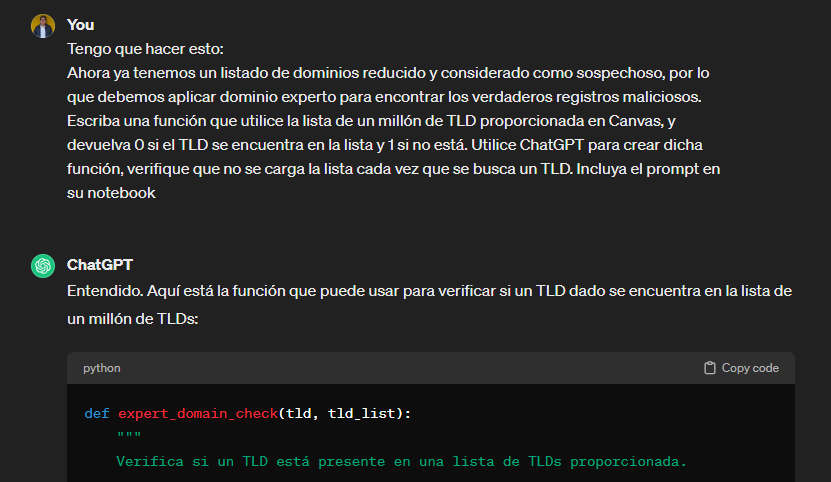

14. Utilice la función para determinar si los TLD se encuentran en dicha lista. Filtre aquellos que si
se encuentran. Después de eliminar duplicados, debería obtener 13 dominios

In [214]:
top_1m = pd.read_csv("top-1m.csv", header=None, names=["rank", "domain"])
top_1m.head()

,rank,domain
0,1,google.com
1,2,www.google.com
2,3,microsoft.com
3,4,data.microsoft.com
4,5,events.data.microsoft.com


In [215]:
tld_list = top_1m["domain"].tolist()

dga_unique['in_tld_list'] = dga_unique['domain_tld'].apply(lambda x: expert_domain_check(get_tld(x), tld_list))

dga_expert_filtered = dga_unique[dga_unique['in_tld_list'] == 0]

dga_expert_unique = dga_expert_filtered.drop_duplicates(subset=['domain_tld'])

print("Cantidad de dominios únicos en la lista de un millón de TLDs:", len(dga_expert_unique))
dga_expert_unique

Cantidad de dominios únicos en la lista de un millón de TLDs: 22


<ipython-input-215-80b78bdfc627>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dga_unique['in_tld_list'] = dga_unique['domain_tld'].apply(lambda x: expert_domain_check(get_tld(x), tld_list))


,domain_tld,isDGA,in_tld_list
1,dropbox.com,1,0
12,metasploit.com,1,0
303,windows.com,1,0
828,phpmyadmin.net,1,0
838,microsoft.com,1,0
887,postgresql.org,1,0
985,freepbx.org,1,0
1415,flickr.com,1,0
1607,facebook.com,1,0
1833,xmarks.com,1,0


15. Finalmente, para confirmar los dominios maliciosos podemos buscar la fecha de creación del
TLD. Cree una función qué en base al TLD, devuelva la fecha de creación de este. Utilice
ChatGPT para escribir dicha función, incluya el prompt utilizado en su notebook

In [216]:
!pip install whois

In [217]:
import whois

def get_creation_date(tld):
    try:
        # Obtener información de whois para el TLD
        domain_info = whois.whois(tld)
        # Extraer la fecha de creación del TLD
        creation_date = domain_info.creation_date
        # Si creation_date es una lista, tomar el primer elemento
        if isinstance(creation_date, list):
            creation_date = creation_date[0]
        # Formatear la fecha como YYYY-MM-DD
        creation_date_str = creation_date.strftime('%Y-%m-%d')
        return creation_date_str
    except Exception as e:
        return "Error: No se pudo obtener la fecha de creación del TLD"

tld_to_check = "google.com"
print("Fecha de creación de", tld_to_check, ":", get_creation_date(tld_to_check))

Fecha de creación de google.com : Error: No se pudo obtener la fecha de creación del TLD


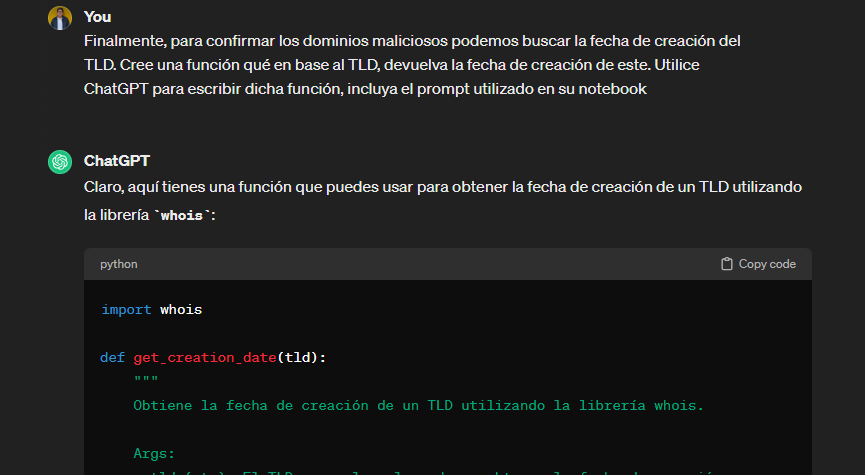

16. Muestre la fecha de creación para cada uno de los 13 dominios finales ¿Cuáles son los
dominios que podemos confirmar como sospechosos?

In [218]:
dga_expert_unique['creation_date'] = dga_expert_unique['domain_tld'].apply(get_creation_date)

print("Fecha de creación de cada dominio sospechoso:")
print(dga_expert_unique[['domain_tld', 'creation_date']])

suspect_domains = dga_expert_unique['domain_tld'][dga_expert_unique['creation_date'] == "Error: No se pudo obtener la fecha de creación del TLD"]
print("\nDominios sospechosos sin fecha de creación disponible:")
print(suspect_domains)

Fecha de creación de cada dominio sospechoso:
           domain_tld                                      creation_date
1         dropbox.com  Error: No se pudo obtener la fecha de creación...
12     metasploit.com  Error: No se pudo obtener la fecha de creación...
303       windows.com  Error: No se pudo obtener la fecha de creación...
828    phpmyadmin.net  Error: No se pudo obtener la fecha de creación...
838     microsoft.com  Error: No se pudo obtener la fecha de creación...
887    postgresql.org  Error: No se pudo obtener la fecha de creación...
985       freepbx.org  Error: No se pudo obtener la fecha de creación...
1415       flickr.com  Error: No se pudo obtener la fecha de creación...
1607     facebook.com  Error: No se pudo obtener la fecha de creación...
1833       xmarks.com  Error: No se pudo obtener la fecha de creación...
2107        adams.net  Error: No se pudo obtener la fecha de creación...
2113     clarkson.edu  Error: No se pudo obtener la fecha de creación...
2132 

17. Recuerde que los dominios DGA son conocidos por formarse de forma aleatoria: secuencias
aleatorias de caracteres, no palabras. Indique que dominios sospechosos tienen este patrón y
que pueden confirmarse como dominios DGA.


En este caso los dominios que mas brindan sospechas entre los que no se pudo encontrar la fecha de creacion son:
metasploit.com

1.   freepbx.org
2. xmarks.com
3. adams.net
4. clarkson.edu
5. wisc.edu
6. easynews.com
7. bluehost.com
8. kernel.org
9. liquidweb.com
10. team-cymru.org
11. xmission.com
12. msftncsi.com
13. metasploit.com